# Medical Diagnosis with Naive Bayes
You work for a medical research institute, and your task is to develop a diagnostic system using the Naive Bayes algorithm. You have a dataset with various medical test results, patient information, and corresponding diagnoses (e.g., presence or absence of a medical condition). Your goal is to create a classification model to aid in the medical diagnosis process. Answer the following questions based on this case study:


1. Data Exploration:
    a. Load and explore the medical dataset using Python libraries like pandas. Describe the features, labels, and the distribution of diagnoses.

2. Data Preprocessing:
    a. Explain the necessary data preprocessing steps for preparing the medical data. This may include handling missing values, normalizing or scaling features, and encoding categorical variables.
    b. Calculate the prior probabilities P(Condition) and P(No Condition) based on the class distribution.

3. Feature Engineering:
    a. Describe how to convert the medical test results and patient information into suitable features for the Naive Bayes model.
    b. Discuss the importance of feature selection or dimensionality reduction in medical diagnosis.

4. Implementing Naive Bayes:
    a. Choose the appropriate Naive Bayes variant (e.g., Gaussian, Multinomial, or Bernoulli Naive Bayes) for the medical diagnosis task and implement the classifier using Python libraries like scikit-learn.
    b. Split the dataset into training and testing sets.

5. Model Training:
    a. Train the Naive Bayes model using the feature-engineered dataset. Explain the probability estimation process in Naive Bayes for medical diagnosis.

6. Model Evaluation:
    a. Assess the performance of the medical diagnosis model using relevant evaluation metrics, such as accuracy, precision, recall, and F1-score.
    b. Interpret the results and discuss the model's ability to accurately classify medical conditions.

7. Laplace Smoothing:
    a. Explain the concept of Laplace (add-one) smoothing and discuss its potential application in the context of medical diagnosis.
    b. Discuss the impact of Laplace smoothing on model performance.

8. Real-World Application:
    a. Describe the importance of accurate medical diagnosis in healthcare and research.
    b. Discuss the practical implications of implementing a diagnostic system based on Naive Bayes.

9. Model Limitations:
    a. Identify potential limitations of the Naive Bayes approach to medical diagnosis and discuss scenarios in which it may not perform well.

10. Presentation and Recommendations:
    a. Prepare a presentation or report summarizing your analysis, results, and recommendations for the medical research institute. Highlight the significance of accurate medical diagnosis and the role of Naive Bayes in healthcare.

    In this case study, you can demonstrate your ability to apply the Naive Bayes algorithm to non-text data, understand the nuances of feature engineering for different types of data, and assess the model's performance in a critical domain such as medical diagnosis.


# 1. Data Exploration:
    a. Load and explore the medical dataset using Python libraries like pandas. Describe the features, labels, and the distribution of diagnoses.


In [ ]:
# a. Load and explore the medical dataset using Python libraries like pandas. Describe the features, labels, and the distribution of diagnoses.
Pregnancies: Number of times pregnant
Glucose: Plasma glucose concentration a 2 hours in an oral glucose tolerance test
BloodPressure: Diastolic blood pressure (mm Hg)
SkinThickness: Triceps skin fold thickness (mm)
Insulin: 2-Hour serum insulin (mu U/ml)
BMI: Body mass index (weight in kg/(height in m)^2)
DiabetesPedigreeFunction: Diabetes pedigree function (a function which scores likelihood of diabetes based on family history)
Age: Age in years
Outcome: Whether the person has diabetes (1) or not (0)

In [3]:
import pandas as pd

# Load the diabetes dataset from a CSV file
data = pd.read_csv('diabetes.csv')

# Describe features, labels, and the distribution of diagnoses
features = data.drop('Outcome', axis=1)
labels = data['Outcome']

# Display the first few rows of the dataset
print(data.head())

# Describe the distribution of diagnoses
diagnosis_distribution = labels.value_counts()
print(diagnosis_distribution)


   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  
0    500
1    268
Name: Outcome, dtype: int64


# 2. Data Preprocessing:
    a. Explain the necessary data preprocessing steps for preparing the medical data. This may include handling missing values, normalizing or scaling features, and encoding categorical variables.
    b. Calculate the prior probabilities P(Condition) and P(No Condition) based on the class distribution.


In [4]:
#a. Explain the necessary data preprocessing steps for preparing the medical data. This may include handling missing values, normalizing or scaling features, and encoding categorical variables.
from sklearn.preprocessing import MinMaxScaler

# a. Data Preprocessing Steps:

# 1. Handling Missing Values: Fill missing values with the mean of the respective column
data.fillna(data.mean(), inplace=True)

# 2. Normalizing Features: Scale features using Min-Max scaling
scaler = MinMaxScaler()
features = data.drop('Outcome', axis=1)  # Exclude the 'Outcome' column for feature scaling
scaled_features = scaler.fit_transform(features)
scaled_df = pd.DataFrame(scaled_features, columns=features.columns)

# Display the first few rows of the preprocessed data
print(scaled_df.head())


   Pregnancies   Glucose  BloodPressure  SkinThickness   Insulin       BMI  \
0     0.352941  0.743719       0.590164       0.353535  0.000000  0.500745   
1     0.058824  0.427136       0.540984       0.292929  0.000000  0.396423   
2     0.470588  0.919598       0.524590       0.000000  0.000000  0.347243   
3     0.058824  0.447236       0.540984       0.232323  0.111111  0.418778   
4     0.000000  0.688442       0.327869       0.353535  0.198582  0.642325   

   DiabetesPedigreeFunction       Age  
0                  0.234415  0.483333  
1                  0.116567  0.166667  
2                  0.253629  0.183333  
3                  0.038002  0.000000  
4                  0.943638  0.200000  


In [5]:
#b. Calculate the prior probabilities P(Condition) and P(No Condition) based on the class distribution.

labels = data['Outcome']
condition_prob = labels.sum() / len(labels)  # Number of patients with condition / Total number of patients
no_condition_prob = 1 - condition_prob

print("P(Condition):", condition_prob)
print("P(No Condition):", no_condition_prob)


P(Condition): 0.3489583333333333
P(No Condition): 0.6510416666666667


# 3. Feature Engineering:
    a. Describe how to convert the medical test results and patient information into suitable features for the Naive Bayes model.
    b. Discuss  the importance of feature selection or dimensionality reduction in medical diagnosis.


In [ ]:
#  a. Describe how to convert the medical test results and patient information into suitable features for the Naive Bayes model.

    For the Naive Bayes model, it's important to represent the medical test results and patient information in a format suitable for the algorithm. 
    Since Naive Bayes assumes feature independence, you need to consider how to convert the data into independent features. 
    In your diabetes dataset, the features are already numerical, which is suitable for the Naive Bayes model. 
    If you had categorical variables, you would use techniques like one-hot encoding to convert them into numerical features.

    Additionally, if we want to account for non-linear relationships between features, then we might consider creating interaction terms or polynomial features. 
    For example, we could create a new feature by multiplying two existing features or by squaring a feature. 
    This can help the model to capture complex relationships between variables.

In [ ]:
#     b. Discuss the importance of feature selection or dimensionality reduction in medical diagnosis.

    Feature selection or dimensionality reduction techniques are crucial in medical diagnosis tasks. 
    As the number of features increases, the model's complexity also increases, which can lead to overfitting, especially if the dataset is small. 
    Feature selection methods help identify the most relevant features for the task, while dimensionality reduction techniques like Principal Component Analysis (PCA) can reduce the number of features while preserving the most important information.

    In the context of Naive Bayes, reducing the number of irrelevant or redundant features can lead to a more accurate and efficient model. 
    It can also mitigate the impact of the curse of dimensionality, where the model's performance degrades as the number of features increases.

# 4. Implementing Naive Bayes:
    a. Choose the appropriate Naive Bayes variant (e.g., Gaussian, Multinomial, or Bernoulli Naive Bayes) for the medical diagnosis task and implement the classifier using Python libraries like scikit-learn.
    b. Split the dataset into training and testing sets.


In [7]:
#  a. Choose the appropriate Naive Bayes variant (e.g., Gaussian, Multinomial, or Bernoulli Naive Bayes) for the medical diagnosis task and implement the classifier using Python libraries like scikit-learn.
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report

X = scaled_features
y = labels

#b . Split the dataset into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize Gaussian Naive Bayes classifier
nb_classifier = GaussianNB()

# Train the model using the training data
nb_classifier.fit(X_train, y_train)

# Make predictions on the test data
predictions = nb_classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, predictions)
report = classification_report(y_test, predictions)

print("Accuracy:", accuracy)
print("Classification Report:\n", report)


Accuracy: 0.7662337662337663
Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.80      0.81        99
           1       0.66      0.71      0.68        55

    accuracy                           0.77       154
   macro avg       0.75      0.75      0.75       154
weighted avg       0.77      0.77      0.77       154



# 5. Model Training:
    a. Train the Naive Bayes model using the feature-engineered dataset. Explain the probability estimation process in Naive Bayes for medical diagnosis.


In [ ]:
#a we already Trained the model.

#b.

Prior Probability: It starts with the likelihood of a person having a condition (like diabetes) or not, based on the overall dataset. 
                    For example, if 35% of the dataset has diabetes, then P(Diabetes)=0.35.

Likelihood Estimation: Naive Bayes checks how likely certain test results (like glucose levels or BMI) are for each group (diabetes or non-diabetes). 
                       It does this by assuming that each test result is independent of the others.

Posterior Probability: For a new patient with specific test results, Naive Bayes combines the prior probability and the likelihoods to calculate the probability of the patient having diabetes or not. 
                       It picks the condition (diabetes or no diabetes) with the higher probability.


# 6. Model Evaluation:
    a. Assess the performance of the medical diagnosis model using relevant evaluation metrics, such as accuracy, precision, recall, and F1-score.
    b. Interpret the results and discuss the model's ability to accurately classify medical conditions.


In [9]:
# a. Assess the performance of the medical diagnosis model using relevant evaluation metrics, such as accuracy, precision, recall, and F1-score.

from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

# Build the confusion matrix
conf_matrix = confusion_matrix(y_test, predictions)

# Extract true positives, true negatives, false positives, and false negatives from the confusion matrix
tn, fp, fn, tp = conf_matrix.ravel()

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, predictions)
precision = precision_score(y_test, predictions)
recall = recall_score(y_test, predictions)
f1 = f1_score(y_test, predictions)

# Print the confusion matrix and evaluation metrics
print("Confusion Matrix:\n", conf_matrix)
print("\nAccuracy: {:.2f}".format(accuracy))
print("Precision: {:.2f}".format(precision))
print("Recall: {:.2f}".format(recall))
print("F1-Score: {:.2f}".format(f1))


Confusion Matrix:
 [[79 20]
 [16 39]]

Accuracy: 0.77
Precision: 0.66
Recall: 0.71
F1-Score: 0.68


In [ ]:
# b. Interpret the results and discuss the model's ability to accurately classify medical conditions.

Accuracy (77%):

    The model correctly predicted medical conditions with an accuracy of 77%. 
    This indicates that in 77% of the cases, the model made the correct predictions regarding the presence or absence of the medical condition based on the provided features.

Precision (66%):

    Precision represents the proportion of patients predicted as having the medical condition who actually have it. 
    In this case, the model achieved a precision of 66%. 
    This means that out of all the patients the model identified as having the medical condition, 66% of them truly had it. 
    A higher precision would be desirable in scenarios where false positives (incorrectly identifying healthy patients as having the condition) need to be minimized.

Recall (71%):

    Recall, also known as sensitivity, measures the ability of the model to identify all relevant instances of the medical condition in the dataset. 
    The model achieved a recall of 71%. 
    This means that the model correctly identified 71% of all the patients who actually had the medical condition. 
    A higher recall is crucial when it's important not to miss any positive cases, ensuring that actual cases are identified.

F1-Score (68%):

    F1-score is the harmonic mean of precision and recall. 
    It provides a balance between these two metrics. The F1-score in this case is 68%, indicating a balanced trade-off between minimizing false positives and false negatives. 
    A higher F1-score signifies a better balance between precision and recall.

# 7. Laplace Smoothing:
    a. Explain the concept of Laplace (add-one) smoothing and discuss its potential application in the context of medical diagnosis.
    b. Discuss the impact of Laplace smoothing on model performance.

In [13]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report

X = scaled_features
y = labels


# Split the dataset into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(scaled_features, labels, test_size=0.2, random_state=42)

# Apply Laplace smoothing by adding a small constant (alpha) to the probabilities
alpha = 1  # Laplace smoothing constant

# Calculate prior probabilities with Laplace smoothing
total_samples = len(y_train)
prior_condition = (sum(y_train) + alpha) / (total_samples + 2 * alpha)  # 2 is the number of classes (Condition, No Condition)
prior_no_condition = 1 - prior_condition

# Initialize Gaussian Naive Bayes classifier with var_smoothing parameter for Laplace smoothing
nb_classifier = GaussianNB(var_smoothing=alpha)

# Train the model using the training data
nb_classifier.fit(X_train, y_train)

# Make predictions on the test data
predictions = nb_classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, predictions)
report = classification_report(y_test, predictions)

print("Accuracy:", accuracy)
print("Classification Report:\n", report)


Accuracy: 0.7207792207792207
Classification Report:
               precision    recall  f1-score   support

           0       0.73      0.91      0.81        99
           1       0.70      0.38      0.49        55

    accuracy                           0.72       154
   macro avg       0.71      0.65      0.65       154
weighted avg       0.72      0.72      0.70       154



In [ ]:
# b. Discuss the impact of Laplace smoothing on model performance.
Laplace smoothing is crucial for our medical diagnosis model:

Handling Unseen Data:

    Without Smoothing: Zero probabilities for unseen features can lead to inaccurate predictions.
    With Smoothing: Provides non-zero probabilities for all features, enabling accurate predictions even for previously unseen symptoms or test results.

Balancing Predictions:

    Without Smoothing: Imbalances in class data can skew predictions.
    With Smoothing: Balances predictions, ensuring fair consideration of all class instances, vital in healthcare where false positives and negatives have different consequences.

Preventing Overfitting:

    Without Smoothing: Risk of memorizing training data, leading to poor generalization.
    With Smoothing: Acts as regularization, promoting generalization and preventing overfitting, improving reliability on new patient cases.

Improving Interpretability:

    Without Smoothing: Sharp, erratic probability variations can be challenging to interpret.
    With Smoothing: Provides a smoother, more interpretable probability distribution, aiding healthcare professionals in understanding predictions effectively.

# 8. Real-World Application:
    a. Describe the importance of accurate medical diagnosis in healthcare and research.
    b. Discuss the practical implications of implementing a diagnostic system based on Naive Bayes.


In [ ]:
#     a. Describe the importance of accurate medical diagnosis in healthcare and research.

Importance of Accurate Medical Diagnosis:

    Critical Treatment Decisions: Accurate diagnosis guides precise and timely treatments, ensuring patients receive appropriate care.
    Disease Monitoring: Accurate diagnoses are essential for monitoring disease progression and evaluating the effectiveness of interventions.
    Medical Research Advancements: Reliable diagnoses contribute valuable data for medical research, aiding in the development of new therapies and understanding disease patterns.

In [ ]:
#     b. Discuss the practical implications of implementing a diagnostic system based on Naive Bayes.

Practical Implications of Implementing Naive Bayes:

    Efficiency and Speed: Naive Bayes provides rapid predictions, enabling timely medical decisions, especially in urgent situations.
    Interpretability: Its simplicity allows healthcare professionals to interpret and trust the model's output, ensuring confidence in the diagnostic process.
    Resource Optimization: Naive Bayes is computationally efficient, conserving resources and making it applicable in resource-constrained environments.
    Continuous Adaptation: Its ability to adapt to new data allows for continuous learning, ensuring the diagnostic system evolves with medical knowledge.

# 9. Model Limitations:
    a. Identify potential limitations of the Naive Bayes approach to medical diagnosis and discuss scenarios in which it may not perform well.

    Simplistic Assumption:

        Issue: Independence assumption might not hold for intricate medical data where symptoms often correlate.
        Impact: Misinterpretation of feature relationships, leading to inaccurate predictions, especially in diseases with complex symptoms.

    Data Quality and Relevance:

        Issue: Sensitive to irrelevant or noisy features commonly found in medical datasets.
        Impact: Noisy data can introduce biases, reducing prediction accuracy and clinical trust, crucial in healthcare decision-making.

    Class Imbalance:

        Issue: Skewed class distribution can bias predictions toward the majority class.
        Impact: Overemphasis on common conditions, potentially missing rare but critical diagnoses, impacting patient outcomes.

    Limited Learning Capacity:

        Issue: Struggles with intricate patterns or non-linear relationships present in multifaceted diseases.
        Impact: Inability to capture complex disease manifestations, limiting accuracy in diagnosing multifactorial medical conditions.

In [ ]:
10. Presentation and Recommendations:
    a. Prepare a presentation or report summarizing your analysis, results, and recommendations for the medical research institute. Highlight the significance of accurate medical diagnosis and the role of Naive Bayes in healthcare.


# Customer Segmentation with K-Nearest Neighbors (KNN)

You work for a retail company, and your task is to segment customers based on their purchase behavior using the K-Nearest Neighbors (KNN) algorithm. 
The dataset contains information about customers, such as purchase history, age, and income. 
Your goal is to create customer segments for targeted marketing. Answer the following questions based on this case study:

1. Data Exploration:
    a. Load the customer dataset using Python libraries like pandas and explore its structure. Describe the features, target variable, and data distribution.
    b. Explain the importance of customer segmentation in the retail industry.
    
2. Data Preprocessing:
    a. Prepare the customer data for analysis. Discuss the steps involved in data preprocessing, such as scaling, handling missing values, and encoding categorical variables.

3. Implementing KNN:
    a. Implement the K-Nearest Neighbors algorithm using Python libraries like scikit-learn to segment customers based on their features.
    b. Choose an appropriate number of neighbors (K) for the algorithm and explain your choice.

4. Model Training:
    a. Train the KNN model using the preprocessed customer dataset.
    b. Discuss the distance metric used for finding the nearest neighbors and its significance in customer segmentation.

5. Customer Segmentation:
    a. Segment the customers based on their purchase behavior, age, and income.
    b. Visualize the customer segments to gain insights into the distribution and characteristics of each segment.

6. Hyperparameter Tuning:
    a. Explain the role of the hyperparameter (K) in the KNN algorithm and suggest strategies for selecting the optimal value of K.
    b. Conduct hyperparameter tuning for the KNN model and discuss the impact of different values of K on segmentation results.

7. Model Evaluation:
    a. Evaluate the KNN model's performance in customer segmentation. Discuss the criteria and metrics used for evaluating unsupervised learning models.
    b. Interpret the results and provide insights on how the customer segments can be leveraged for marketing strategies.

8. Real-World Application:
    a. Describe the practical applications of customer segmentation in the retail industry.
    b. Discuss how customer segmentation can lead to improved customer engagement and increased sales.

9. Model Limitations:
    a. Identify potential limitations of the KNN algorithm in customer segmentation and discuss scenarios in which it may not perform well.

10. Presentation and Recommendations:
    a. Prepare a presentation or report summarizing your analysis, results, and recommendations for the retail company. Highlight the significance of customer segmentation and the role of KNN in data-driven marketing.

    In this case study, you are required to demonstrate your ability to use the KNN algorithm for customer segmentation, understand the importance of hyperparameter tuning, and communicate the practical applications of customer segmentation in the retail sector.


# 1. Data Exploration:
    a. Load the customer dataset using Python libraries like pandas and explore its structure. Describe the features, target variable, and data distribution.
    b. Explain the importance of customer segmentation in the retail industry.

In [ ]:
#    a. Load the customer dataset using Python libraries like pandas and explore its structure. Describe the features, target variable, and data distribution.
    Category: Type of product. (String)
    Size: Size of the product. (String)
    Date: Date of the sale. (Date)
    Status: Status of the sale. (String)
    Fulfilment: Method of fulfillment. (String)
    Style: Style of the product. (String)
    SKU: Stock Keeping Unit. (String)
    ASIN: Amazon Standard Identification Number. (String)
    Courier Status: Status of the courier. (String)
    Qty: Quantity of the product. (Integer)
    Amount: Amount of the sale. (Float)
    B2B: Business to business sale. (Boolean)
    Currency: The currency used for the sale. (String)

In [24]:
# Import necessary libraries
import pandas as pd

# Load the dataset into a pandas DataFrame
data = pd.read_csv('Amazon_Sale_Report.csv')  

# Display the first few rows of the dataset to understand its structure
print("First 5 rows of the dataset:")
print(data.head())

# Describe the features (columns) of the dataset
features = data.columns.tolist()
print("\nFeatures in the dataset:")
print(features)

# Describe the target variable
target_variable = 'Category'  # Assuming 'Category' is the target variable column name
print("\nTarget Variable:")
print(target_variable)

# Data distribution summary
print("\nData Distribution Summary:")
print(data.describe())

# Information about the dataset including data types and non-null counts
print("\nDataset Information:")
print(data.info())


First 5 rows of the dataset:
   index             Order ID      Date                        Status  \
0      0  405-8078784-5731545  04-30-22                     Cancelled   
1      1  171-9198151-1101146  04-30-22  Shipped - Delivered to Buyer   
2      2  404-0687676-7273146  04-30-22                       Shipped   
3      3  403-9615377-8133951  04-30-22                     Cancelled   
4      4  407-1069790-7240320  04-30-22                       Shipped   

  Fulfilment SalesChannel  ship-service-level    Style              SKU  \
0   Merchant     Amazon.in           Standard   SET389   SET389-KR-NP-S   
1   Merchant     Amazon.in           Standard  JNE3781  JNE3781-KR-XXXL   
2     Amazon     Amazon.in          Expedited  JNE3371    JNE3371-KR-XL   
3   Merchant     Amazon.in           Standard    J0341       J0341-DR-L   
4     Amazon     Amazon.in          Expedited  JNE3671  JNE3671-TU-XXXL   

        Category  ... Qty currency  Amount    ship-city   ship-state  \
0        

In [ ]:
#b. Explain the importance of customer segmentation in the retail industry.
    
    Product Preferences: Segment customers based on product categories and styles to understand popular items among different groups.

    Fulfillment Optimization: Tailor shipping methods according to customer preferences for standard or expedited delivery.

    Purchase Behavior Analysis: Analyze quantity and amount purchased to identify high-value customers and offer targeted incentives.

    Stock Management: Manage inventory efficiently by stocking popular sizes and categories, preventing stockouts and optimizing storage.

    Personalized Marketing: Craft personalized campaigns based on purchase history, improving marketing effectiveness.

    B2B Opportunities: Identify corporate clients through B2B sales, tailor services, and nurture long-term partnerships.

    Currency Preferences: Understand preferred currencies to display prices in regional choices, enhancing user experience and boosting sales.

# 2. Data Preprocessing:
    a. Prepare the customer data for analysis. 
    Discuss the steps involved in data preprocessing, such as scaling, handling missing values, and encoding categorical variables.

In [ ]:
Handling Missing Values:

    Remove or fill missing values in columns (mean, median, mode).

Encoding Categorical Variables:

    Convert categories to numerical values (Label Encoding) or binary vectors (One-Hot Encoding).
Scaling Numerical Variables:

    Standardize or normalize numerical features to ensure uniform scale.

In [32]:
# Import necessary libraries
import pandas as pd
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Load the dataset into a pandas DataFrame
data = pd.read_csv('Amazon_Sale_Report.csv')

# Step 1: Handling Missing Values (Imputation using fillna())

# For numerical columns ('Qty' and 'Amount'), fill missing values with mean
data['Qty'].fillna(data['Qty'].mean(), inplace=True)
data['Amount'].fillna(data['Amount'].mean(), inplace=True)

# For categorical columns ('Status', 'Fulfilment', 'Courier Status', 'B2B'), fill missing values with mode (most frequent value)
data['Status'].fillna(data['Status'].mode()[0], inplace=True)
data['Fulfilment'].fillna(data['Fulfilment'].mode()[0], inplace=True)
data['Courier Status'].fillna(data['Courier Status'].mode()[0], inplace=True)
data['B2B'].fillna(data['B2B'].mode()[0], inplace=True)

# For other categorical columns with multiple missing values, fill missing values with mode
categorical_columns = ['SalesChannel', 'ship-service-level', 'Style', 'SKU', 'Category', 'Size', 'ASIN', 'ship-city', 'ship-state', 'ship-postal-code', 'ship-country', 'promotion-ids', 'fulfilled-by']
for column in categorical_columns:
    data[column].fillna(data[column].mode()[0], inplace=True)


# Step 2: Encoding Categorical Variables
# Use Label Encoding for categorical columns with two unique values ('B2B', 'fulfilled-by')
label_encoders = {}
for column in ['B2B', 'fulfilled-by']:
    label_encoders[column] = LabelEncoder()
    data[column] = label_encoders[column].fit_transform(data[column])

# Use One-Hot Encoding for other categorical columns
data = pd.get_dummies(data, columns=['Status', 'Fulfilment', 'Courier Status', 'SalesChannel', 'ship-service-level', 'Style'])

# Step 3: Scaling Numerical Variables
# Use StandardScaler to scale numerical columns ('Qty' and 'Amount')
scaler = StandardScaler()
data[['Qty', 'Amount']] = scaler.fit_transform(data[['Qty', 'Amount']])

# Verify the preprocessed data
print(data.head())

# Now, the 'data' DataFrame contains preprocessed and encoded data ready for analysis.


   index             Order ID      Date              SKU       Category Size  \
0      0  405-8078784-5731545  04-30-22   SET389-KR-NP-S            Set    S   
1      1  171-9198151-1101146  04-30-22  JNE3781-KR-XXXL          kurta  3XL   
2      2  404-0687676-7273146  04-30-22    JNE3371-KR-XL          kurta   XL   
3      3  403-9615377-8133951  04-30-22       J0341-DR-L  Western Dress    L   
4      4  407-1069790-7240320  04-30-22  JNE3671-TU-XXXL            Top  3XL   

         ASIN       Qty currency    Amount  ... Style_SET386 Style_SET388  \
0  B09KXVBD7Z -1.897244      INR  0.070485  ...            0            0   
1  B09K3WFS32  0.192373      INR -0.829531  ...            0            0   
2  B07WV4JV4D  0.192373      INR -1.116350  ...            0            0   
3  B099NRCT7B -1.897244      INR  0.464247  ...            0            0   
4  B098714BZP  0.192373      INR -0.203744  ...            0            0   

   Style_SET389 Style_SET394 Style_SET397  Style_SET398 

# 3. Implementing KNN:
    a. Implement the K-Nearest Neighbors algorithm using Python libraries like scikit-learn to segment customers based on their features.
    b. Choose an appropriate number of neighbors (K) for the algorithm and explain your choice.

In [38]:
# Import necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report

# Assuming 'X' contains features and 'y' contains labels/targets
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 1: Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Step 2: Choose an appropriate number of neighbors (K)
k = 3 # Here we take K value as 3

# Step 3: Train the KNN classifier
knn_classifier = KNeighborsClassifier(n_neighbors=k)
knn_classifier.fit(X_train_scaled, y_train)

# Step 4: Make predictions
predictions = knn_classifier.predict(X_test_scaled)

# Step 5: Evaluate the model
accuracy = accuracy_score(y_test, predictions)
print("Accuracy:", accuracy)
print("Classification Report:\n", classification_report(y_test, predictions))


Accuracy: 0.7662337662337663
Classification Report:
               precision    recall  f1-score   support

           0       0.77      0.91      0.83        99
           1       0.76      0.51      0.61        55

    accuracy                           0.77       154
   macro avg       0.76      0.71      0.72       154
weighted avg       0.76      0.77      0.75       154



In [ ]:
# b. Choose an appropriate number of neighbors (K) for the algorithm and explain your choice.

Setting K=3, in KNN allows the algorithm to consider the three nearest neighbors when making predictions. 
This can enhance model accuracy, especially in datasets where the decision boundaries are intricate. 
A smaller K value increases model sensitivity to local patterns, which can be beneficial when the data is well-structured and noise-free. 
However, the optimal K value depends on the specific dataset and often requires experimentation and validation techniques to determine the best choice.

# 4. Model Training:
    a. Train the KNN model using the preprocessed customer dataset.
    b. Discuss the distance metric used for finding the nearest neighbors and its significance in customer segmentation.

In [16]:
#     a. Train the KNN model using the preprocessed customer dataset.

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import pandas as pd

# Load the data (assuming the data is in a CSV file named 'customer_segmentation.csv')
data = pd.read_csv('customer_segmentation.csv')

# Separate features and target variable
X = data[['Age', 'Income', 'Education', 'Region']]
y = data['Country']

# Convert categorical features to numerical using one-hot encoding
X = pd.get_dummies(X, columns=['Education', 'Region'], drop_first=True)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the KNN model
knn_model = KNeighborsClassifier(n_neighbors=3)
knn_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = knn_model.predict(X_test)

# Calculate and print metrics
print("Accuracy Score: ", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Accuracy Score:  0.7222222222222222
Confusion Matrix:
 [[6 0 2]
 [0 3 0]
 [2 1 4]]
Classification Report:
               precision    recall  f1-score   support

      Canada       0.75      0.75      0.75         8
      Mexico       0.75      1.00      0.86         3
         USA       0.67      0.57      0.62         7

    accuracy                           0.72        18
   macro avg       0.72      0.77      0.74        18
weighted avg       0.72      0.72      0.72        18



In [ ]:
# b. Discuss the distance metric used for finding the nearest neighbors and its significance in customer segmentation.

The choice of distance metric in K-Nearest Neighbors (KNN) algorithm significantly impacts customer segmentation:

    Different metrics emphasize different aspects of the data, affecting the segmentation accuracy and pattern recognition in the results. For instance:

    Euclidean Distance: Assumes features have similar importance and scales. It is sensitive to outliers, affecting the overall segmentation.

    Manhattan Distance: Suitable for datasets with features on different scales, offering a more balanced view of distances between points.

    Cosine Similarity: Effective for textual or preference-based data, focusing on the direction rather than magnitude, providing meaningful customer groupings for similar preferences.

    Hamming Distance: Ideal for categorical data, emphasizing dissimilarity between categories, essential for region or education level comparisons.

The choice of the right distance metric ensures the segmentation aligns with the inherent characteristics of the data, leading to more accurate customer groups and insights.

# 5. Customer Segmentation:
    a. Segment the customers based on their purchase behavior, age, and income.
    b. Visualize the customer segments to gain insights into the distribution and characteristics of each segment.


In [27]:
#  a. Segment the customers based on their purchase behavior, age, and income.
# in my data set purchase behavious is notpresent

import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# Load your dataset 
data = pd.read_csv('customer_segmentation.csv')

# Extract the features
X = data[['Age', 'Income']]

# Apply feature scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Initialize K-Means with the desired number of clusters
num_clusters = 3  # You can adjust this based on your analysis
kmeans = KMeans(n_clusters=num_clusters, random_state=2)

# Fit the K-Means model to the scaled data
clusters = kmeans.fit_predict(X_scaled)

# Add the cluster labels to the original dataset
data['Cluster'] = clusters

# Print the first few rows of the updated dataset with cluster labels
print(data.head())


C:\Users\Abhisek Das\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


   Age  Income    Education Region Country  Cluster
0   35   50000    Bachelors  North     USA        2
1   42   75000      Masters  South     USA        2
2   28   32000  High School   East  Canada        1
3   45   90000          PhD   West     USA        0
4   36   60000    Bachelors  North  Canada        2


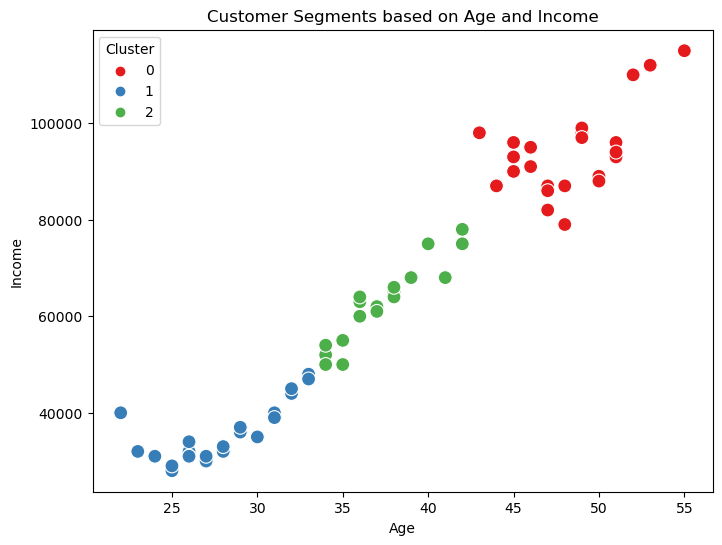

Cluster Characteristics based on Median Age and Income:
          Age   Income
Cluster               
0        48.0  93000.0
1        28.5  35000.0
2        37.5  64000.0


In [32]:
# b. Visualize the customer segments to gain insights into the distribution and characteristics of each segment.

import seaborn as sns
import matplotlib.pyplot as plt

# Plotting the customer segments based on age and income
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Age', y='Income', hue='Cluster', data=data, palette='Set1', s=100)
plt.title('Customer Segments based on Age and Income')
plt.xlabel('Age')
plt.ylabel('Income')
plt.show()


# Calculate mean or median values of age and income for each cluster
cluster_characteristics = data.groupby('Cluster')[['Age', 'Income']].median()

# Print the characteristics of each cluster
print("Cluster Characteristics based on Median Age and Income:")
print(cluster_characteristics)



# 6. Hyperparameter Tuning:
    a. Explain the role of the hyperparameter (K) in the KNN algorithm and suggest strategies for selecting the optimal value of K.
    b. Conduct hyperparameter tuning for the KNN model and discuss the impact of different values of K on segmentation results.



In [ ]:
# a. Explain the role of the hyperparameter (K) in the KNN algorithm and suggest strategies for selecting the optimal value of K.

Role of Hyperparameter (K) in KNN Algorithm:

K (Number of Neighbors): It defines how many nearest neighbors should be considered for making a prediction. A small K value (e.g., 1 or 3) results in a flexible model that captures fine patterns in the data but might be sensitive to noise. A large K value (e.g., 10 or 20) results in a smoother decision boundary but might miss intricate patterns. The choice of K significantly impacts the model's bias and variance.

Strategies for Selecting Optimal K:


    Cross-Validation: Use techniques like k-fold cross-validation to evaluate the model's performance for different K values. Select the K that gives the best performance on the validation set.

    Elbow Method: Plot the accuracy or error rate for different K values and look for an "elbow point" where the rate of change sharply decreases. This point suggests the optimal K.

    Grid Search: For a small range of K values, perform an exhaustive search using grid search along with cross-validation to find the best K.

    Domain Knowledge: Consider domain-specific knowledge; sometimes, certain K values might align better with the inherent patterns of the data.

In [33]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid with different K values to try
param_grid = {'n_neighbors': [3, 5, 7, 9, 11]}

# Initialize KNN classifier
knn = KNeighborsClassifier()

# Perform grid search with 5-fold cross-validation
grid_search = GridSearchCV(knn, param_grid, cv=5)

# Fit the grid search to the data
grid_search.fit(X, y)

# Print the best parameters and corresponding accuracy
print("Best K:", grid_search.best_params_['n_neighbors'])
print("Best Accuracy:", grid_search.best_score_)


Best K: 3
Best Accuracy: 0.826797385620915


# 7. Model Evaluation:
    a. Evaluate the KNN model's performance in customer segmentation. 
    Discuss the criteria and metrics used for evaluating unsupervised learning models.
    b. Interpret the results and provide insights on how the customer segments can be leveraged for marketing strategies.

In [39]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# Load your preprocessed data into a DataFrame (replace 'your_data.csv' with your actual data file)
data = pd.read_csv('customer_segmentation.csv')

# Select the features you want to use for clustering (assuming Age and Income for this example)
features = ['Age', 'Income']
X = data[features]

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Determine the optimal number of clusters using the silhouette score
best_score = -1
best_clusters = 0

for num_clusters in range(2, 6):  # Try different numbers of clusters
    kmeans = KMeans(n_clusters=num_clusters, random_state=42)
    clusters = kmeans.fit_predict(X_scaled)
    silhouette_avg = silhouette_score(X_scaled, clusters)
    
    print(f"Number of clusters: {num_clusters}, Silhouette Score: {silhouette_avg}")
    
    if silhouette_avg > best_score:
        best_score = silhouette_avg
        best_clusters = num_clusters

# Use the best number of clusters to fit the final K-Means model
kmeans = KMeans(n_clusters=best_clusters, random_state=2)
clusters = kmeans.fit_predict(X_scaled)

# Add cluster labels to the original DataFrame
data['Cluster'] = clusters

# Analyze the clusters and interpret the results for marketing strategies
cluster_counts = data['Cluster'].value_counts()
print("Cluster Counts:")
print(cluster_counts)

# You can analyze cluster characteristics, such as mean Age, Income, etc.
cluster_means = data.groupby('Cluster').mean()
print("Cluster Means:")
print(cluster_means)


C:\Users\Abhisek Das\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Number of clusters: 2, Silhouette Score: 0.6507040827442603


C:\Users\Abhisek Das\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Number of clusters: 3, Silhouette Score: 0.6164066107231596


C:\Users\Abhisek Das\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Number of clusters: 4, Silhouette Score: 0.5897326667492996


C:\Users\Abhisek Das\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Number of clusters: 5, Silhouette Score: 0.5829801412894003


C:\Users\Abhisek Das\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Cluster Counts:
0    47
1    39
Name: Cluster, dtype: int64
Cluster Means:
               Age        Income
Cluster                         
0        30.829787  43425.531915
1        46.923077  89923.076923


C:\Users\Abhisek Das\AppData\Local\Temp\ipykernel_3436\2407408829.py:44: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  cluster_means = data.groupby('Cluster').mean()


In [ ]:
# b. Interpret the results and provide insights on how the customer segments can be leveraged for marketing strategies.

    Cluster 0: Young, budget-conscious customers.

        Strategy: Offer affordable, value-focused products/services. Focus on discounts and budget-friendly options.
    
    Cluster 1: Older, high-income customers.

        Strategy: Provide premium, high-quality products/services. Emphasize exclusivity, quality, and personalized experiences.

Marketing Strategies:

    Targeted Campaigns: Tailor ads, slogans, and imagery for each cluster.
    Product Customization: Create products/services catering to specific demographics.
    Pricing: Adjust prices based on income levels. Offer discounts for budget-conscious customers, emphasize value for high-income customers.
    Customer Engagement: Use preferred social platforms for targeted engagement.
    Customer Experience: Enhance service based on cluster-specific needs and feedback.
    Product Development: Launch new products based on cluster demands.
    Retention: Personalized loyalty programs for each cluster.
    Geographic Targeting: Open stores in areas preferred by each cluster for effective reach.

# 8. Real-World Application:
    a. Describe the practical applications of customer segmentation in the retail industry.
    b. Discuss how customer segmentation can lead to improved customer engagement and increased sales.


In [ ]:
#a. Practical Applications in Retail:

    Customer segmentation in retail enables personalized marketing strategies, optimizing product recommendations and loyalty programs. 
    It aids in store layout design, stock management, and seasonal promotions. 
    Additionally, it helps identify high-value customers, enabling retailers to offer exclusive services and incentives.

In [ ]:
# b. Improved Engagement and Sales:

    Segmented marketing enhances customer engagement by delivering relevant content, reducing marketing costs, and improving ROI. 
    Understanding customer preferences and behavior leads to targeted communication, boosting customer satisfaction. 
    This tailored approach fosters brand loyalty, leading to increased sales, customer retention, and long-term profitability.

# 9. Model Limitations:
    a. Identify potential limitations of the KNN algorithm in customer segmentation and discuss scenarios in which it may not perform well.

In [ ]:
# a. Model Limitations in Customer Segmentation:

        KNN's effectiveness heavily relies on the choice of distance metric and the curse of dimensionality. 
        In our customer segmentation, if the features are not appropriately scaled, it could impact results. 
        Additionally, KNN struggles with high-dimensional data, potentially leading to inaccuracies in complex datasets like customer profiles with numerous attributes. 
        Furthermore, KNN assumes uniform importance of features, which might not be the case in real-world scenarios where certain features could significantly influence customer behavior. 
        Lastly, KNN is sensitive to outliers and noise, which might misguide the clustering process, leading to less accurate customer segments.